In [ ]:
!gdown --id 1uc7yr20v4oOeKhoUDfNn2hsvw5hMO6R7

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1uc7yr20v4oOeKhoUDfNn2hsvw5hMO6R7
To: /content/Datasets.zip
100% 2.37M/2.37M [00:00<00:00, 141MB/s]


In [ ]:
!unzip /content/Datasets.zip

Archive:  /content/Datasets.zip
  inflating: Datasets/adult_income_data.csv  
  inflating: Datasets/Classified Data  
  inflating: Datasets/College_Data   
  inflating: Datasets/Concrete_Data.xls  
  inflating: Datasets/Height_Weight.xlsx  
  inflating: Datasets/hypothyroid.csv  
  inflating: Datasets/loan_data.csv  
  inflating: Datasets/Mall_Customers.csv  
  inflating: Datasets/Sample - Superstore.xls  
  inflating: Datasets/slump_test.csv  
  inflating: Datasets/titanic_test.csv  
  inflating: Datasets/titanic_train.csv  
  inflating: Datasets/USA_Housing.csv  
  inflating: Datasets/wine.data.csv  
  inflating: Datasets/winequality-red.csv  


In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats
from statistics import mean
import scipy.stats as st
import statsmodels.api as sm
sns.set()
%matplotlib inline

In [75]:
df=pd.read_excel('/content/Sample - Superstore.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [76]:
df.shape

(9994, 21)

In [77]:
num_rows = df.shape[0]
num_cols = df.shape[1]
print(f"The data sheet has {num_rows} rows and {num_cols} columns.")

The data sheet has 9994 rows and 21 columns.


In [78]:
column_names = df.columns.tolist()
for column in column_names:
    print(column)


Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
Country
City
State
Postal Code
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Check Duplicate Row

In [80]:
#calculate the duplicate value
df.duplicated().any()

False

In [81]:
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []

[0 rows x 21 columns]


Data Types

In [82]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

Data Types Count

In [83]:
#here Row ID is numerical_features type of data
def identify_feature_types(dataframe):
    numerical_features = dataframe.select_dtypes(include=['int', 'float']).columns.tolist()
    categorical_features = dataframe.select_dtypes(include=['object', 'category']).columns.tolist()


    text_features = []  # Add your text feature column names here if applicable
    date_features = dataframe.select_dtypes(include=['datetime64[ns]']).columns.tolist()
    boolean_features = []  # Add your boolean feature column names here if applicable
    geospatial_features = []  # Add your geospatial feature column names here if applicable

    feature_types = {
        'Numerical Features': numerical_features,
        'Categorical Features': categorical_features,
        'Text Features': text_features,
        'Date and Time Features': date_features,
        'Boolean Features': boolean_features,
        'Geospatial Features': geospatial_features
    }

    return feature_types

# Identify the feature types in the DataFrame
feature_types = identify_feature_types(df)

# Print the feature names for each type
for feature_type, features in feature_types.items():
    print(f"{feature_type} : {features} total_number: {len(features)}")

Numerical Features : ['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'] total_number: 6
Categorical Features : ['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name'] total_number: 13
Text Features : [] total_number: 0
Date and Time Features : ['Order Date', 'Ship Date'] total_number: 2
Boolean Features : [] total_number: 0
Geospatial Features : [] total_number: 0


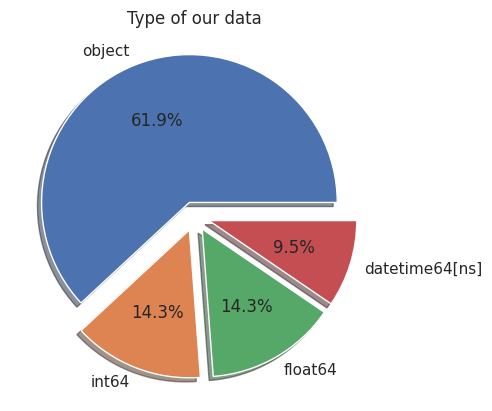

In [84]:
data_types_count = df.dtypes.value_counts()
explode = [0.1] * len(data_types_count)
data_types_count.plot.pie(explode=explode, autopct='%1.1f%%', shadow=True)
plt.title('Type of our data')
plt.show()


Count,Mean Std,min,25%,50%

In [85]:
#to calculate count,mean,std,min,25%,50%,
#75% and max for each numeric columns
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Correlations

In [86]:
#Computer correlations
corr_matrix=df[['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']].corr()
print('\nCorrelation Matrix: ')
print(corr_matrix)


Correlation Matrix: 
             Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales          -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity        0.012761  0.200795  1.000000  0.008623  0.066253
Discount        0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit         -0.029961  0.479064  0.066253 -0.219487  1.000000


Handling The Missing Data

In [87]:
# calculate null values by sort
df.isnull().sum().sort_values(ascending=False)

Row ID           0
Postal Code      0
Discount         0
Quantity         0
Sales            0
Product Name     0
Sub-Category     0
Category         0
Product ID       0
Region           0
State            0
Order ID         0
City             0
Country          0
Segment          0
Customer Name    0
Customer ID      0
Ship Mode        0
Ship Date        0
Order Date       0
Profit           0
dtype: int64

<Axes: >

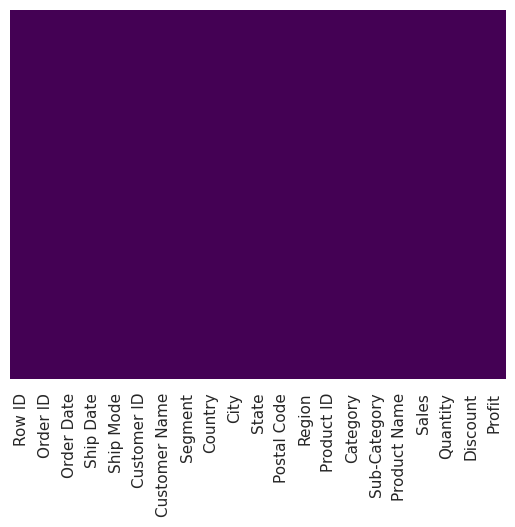

In [88]:
#Here the 'virdis' color is the null of the column
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Count Unique value

In [89]:
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

What is the most preferred Shipment Mode?

In [90]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<Axes: xlabel='Ship Mode', ylabel='count'>

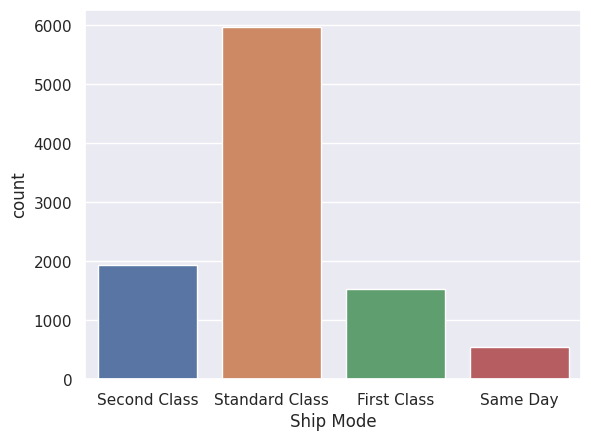

In [91]:
sns.countplot(x=df['Ship Mode'])

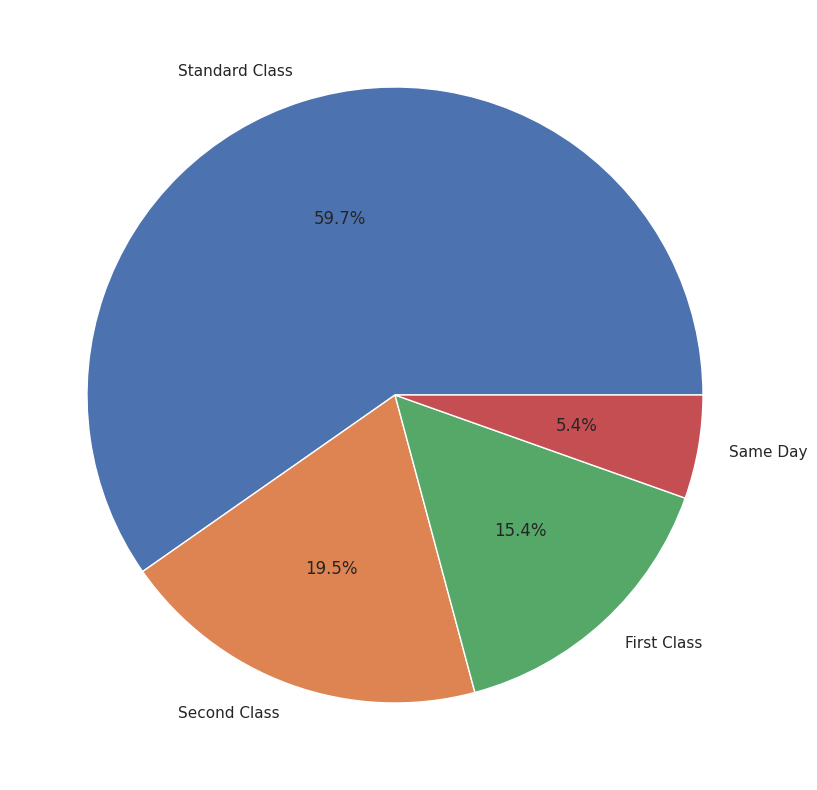

In [92]:
plt.figure(figsize=(15,10))
plt.pie(df['Ship Mode'].value_counts(),labels=df["Ship Mode"].value_counts().keys(),autopct="%0.1f%%")
plt.show()

Calculates the mean values of 'Sales', 'Profit' for each unique 'Ship Mode'. The resulting DataFrame, data_shipmode, presents the average sales, average profit

In [93]:
data_shipmode = df.groupby(['Ship Mode'])[['Sales', 'Profit']].mean()
data_shipmode

,Sales,Profit
Ship Mode,,
First Class,228.497024,31.839948
Same Day,236.396179,29.266591
Second Class,236.089239,29.535545
Standard Class,227.583067,27.494770


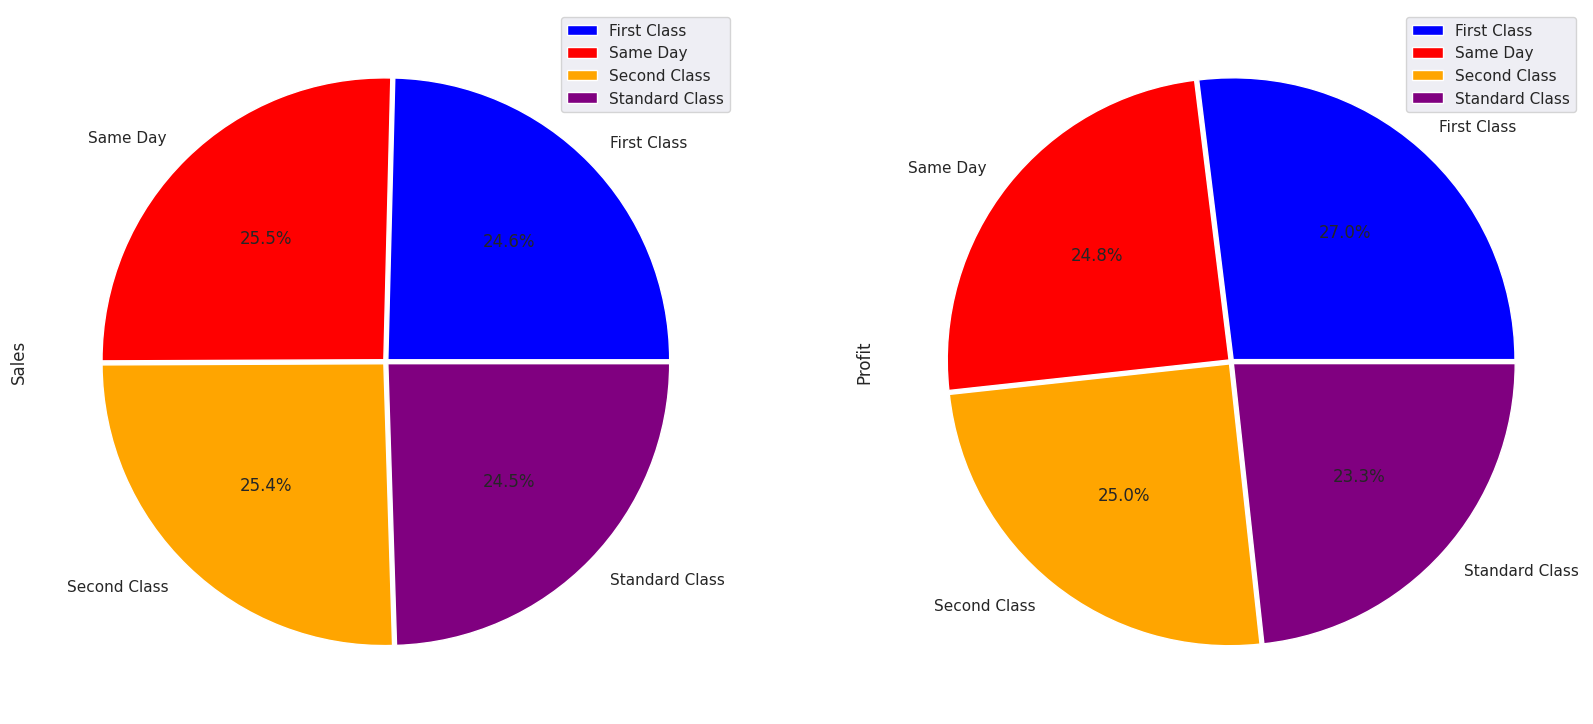

In [94]:
colors_4 = ['blue','red','orange','purple']
data_shipmode.plot.pie(subplots=True, figsize=(20,10), labels=data_shipmode.index, autopct='%1.1f%%', explode=(0.01,0.01,0.01,0.01), colors=colors_4)
plt.show()

<Axes: xlabel='Ship Mode'>

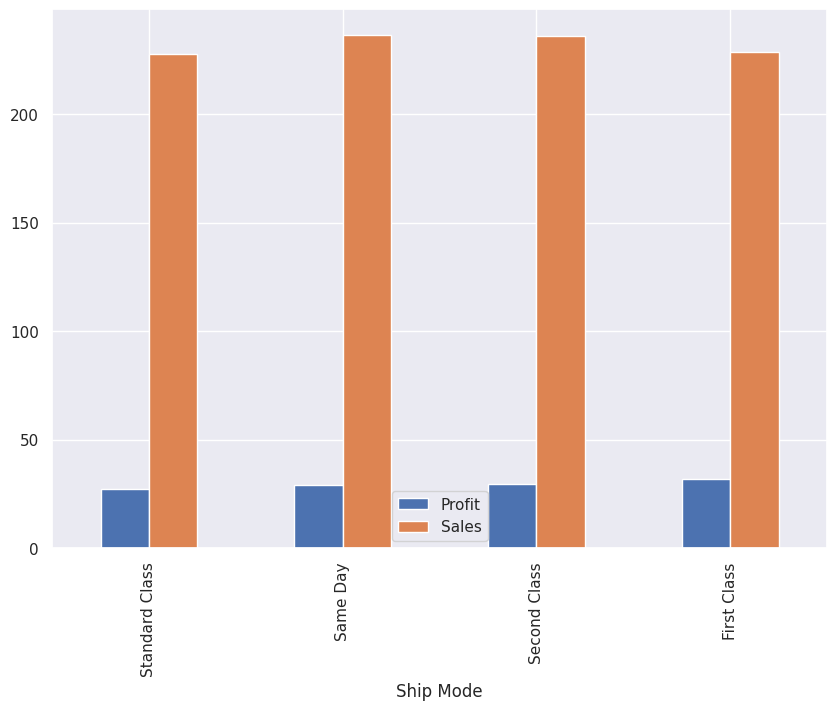

In [95]:
data_shipmode.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(10,7))

Which segment is the best seller?

In [96]:
df["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

<Axes: xlabel='Segment', ylabel='count'>

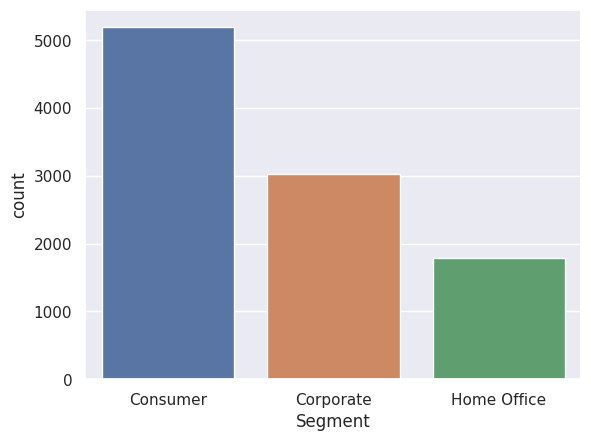

In [97]:
sns.countplot(x=df['Segment'])

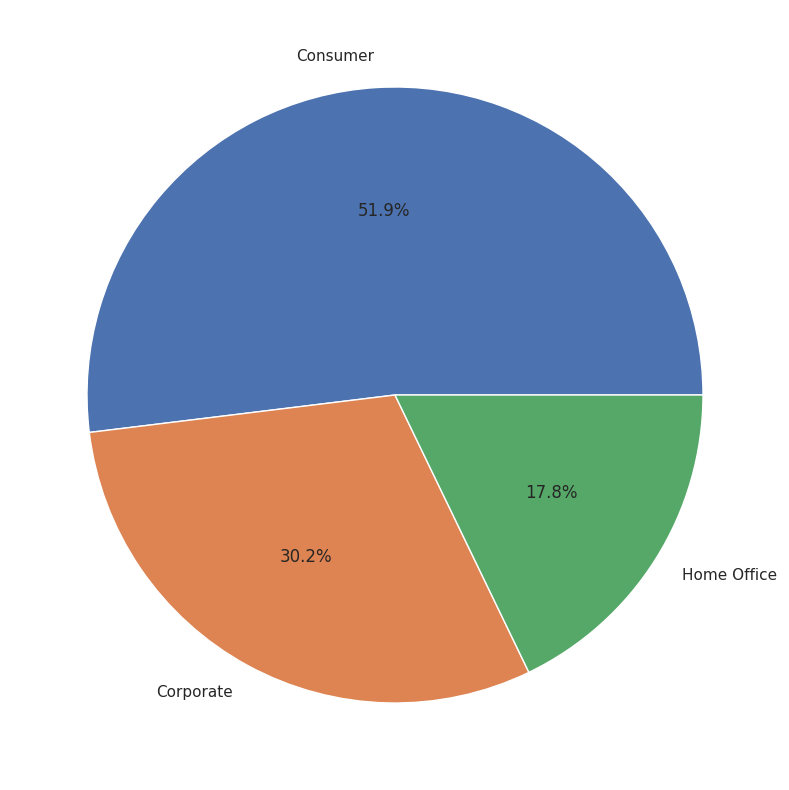

In [98]:
plt.figure(figsize=(15,10))
plt.pie(df['Segment'].value_counts(),labels=df["Segment"].value_counts().keys(),autopct="%0.1f%%")
plt.show()

Calculates the mean values of 'Sales', 'Profit' for each unique 'Segment'. The resulting DataFrame, data_shipmode, presents the average sales, average profit

In [99]:
data_segment = df.groupby(['Segment'])[['Sales', 'Profit']].mean()
data_segment

,Sales,Profit
Segment,,
Consumer,223.733644,25.836873
Corporate,233.823300,30.456667
Home Office,240.972041,33.818664


array([<Axes: ylabel='Sales'>, <Axes: ylabel='Profit'>], dtype=object)

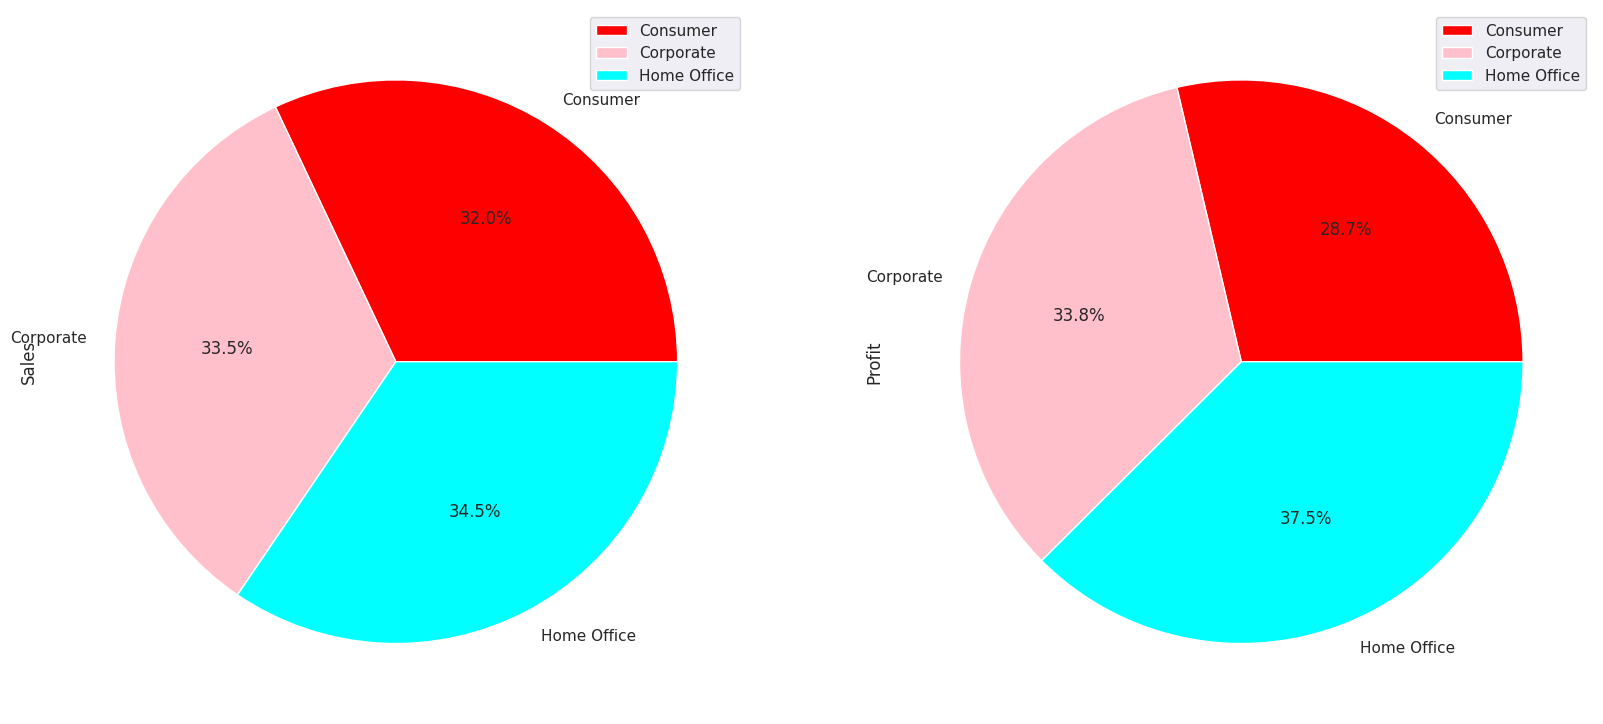

In [100]:
colors_3 = ['red', 'pink','cyan']
data_segment.plot.pie(subplots=True, figsize=(20,10), labels=data_segment.index, autopct='%1.1f%%', colors=colors_3)


<Axes: xlabel='Segment'>

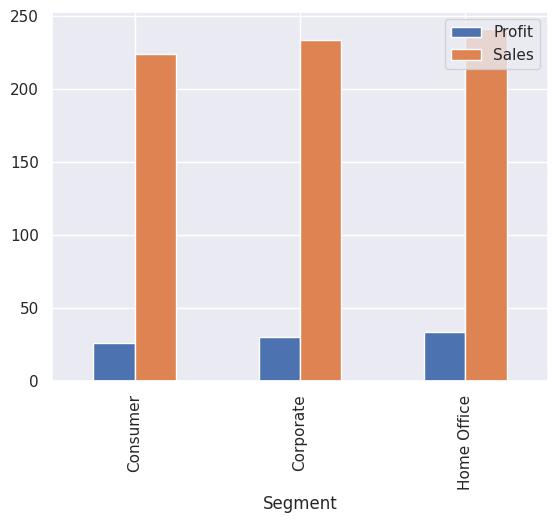

In [101]:
data_segment.sort_values('Profit')[['Profit','Sales']].plot(kind='bar')

Which Region is Most order

In [102]:
df["Region"].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

<Axes: xlabel='Region', ylabel='count'>

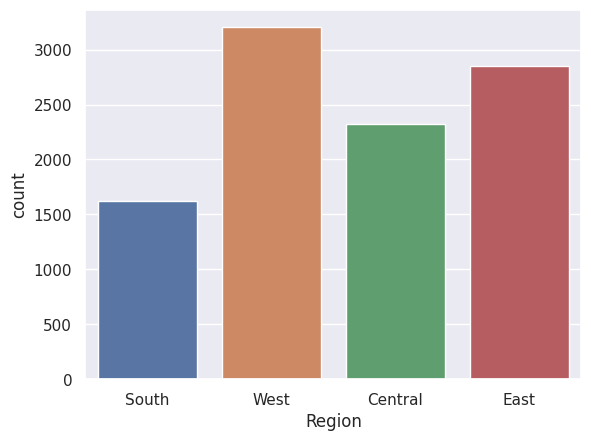

In [103]:
sns.countplot(x=df['Region'])

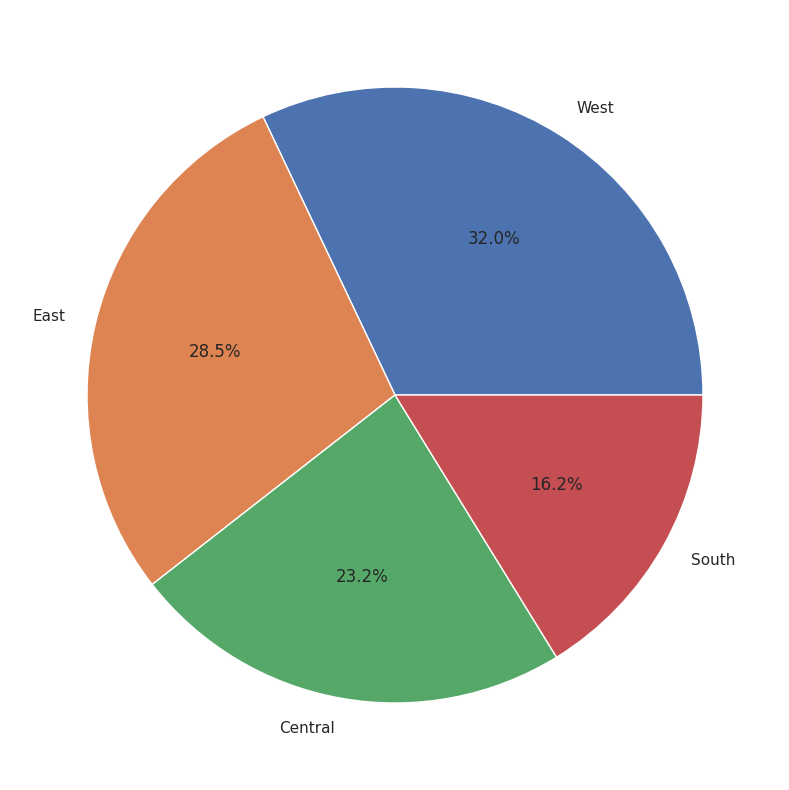

In [104]:
plt.figure(figsize=(15,10))
plt.pie(df['Region'].value_counts(),labels=df["Region"].value_counts().keys(),autopct="%0.1f%%")
plt.show()

Calculates the mean values of 'Sales', 'Profit' for each unique 'Region'. The resulting DataFrame, data_shipmode, presents the average sales, average profit

In [105]:
data_region2 = df.groupby(['Region'])[['Sales','Profit']].mean()
data_region2

,Sales,Profit
Region,,
Central,215.772661,17.092709
East,238.336110,32.135808
South,241.803645,28.857673
West,226.493233,33.849032


array([<Axes: ylabel='Sales'>, <Axes: ylabel='Profit'>], dtype=object)

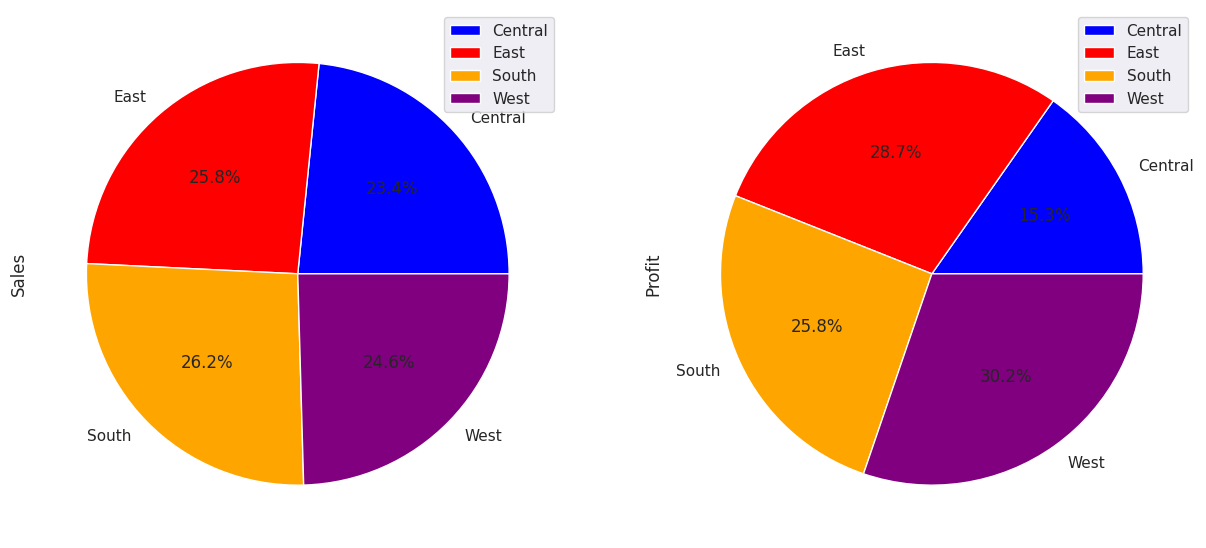

In [106]:
data_region2.plot.pie(subplots=True, figsize=(15,7), autopct='%1.1f%%', label=data_region2.index.values, colors=colors_4)

Top Customers

<Axes: title={'center': 'Customer Name & Product Ordered'}>

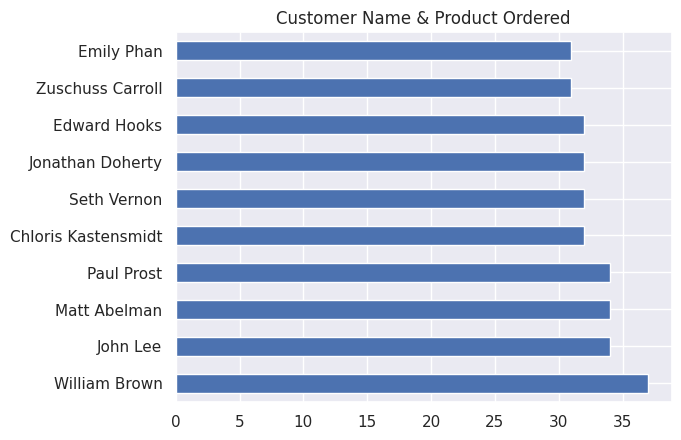

In [107]:
df['Customer Name'].value_counts()[:10].plot(kind='barh',title='Customer Name & Product Ordered')

In [108]:
customers = list(df['Customer Name'].value_counts()[:10].index)
filters = df['Customer Name'].isin(customers)
A = df[filters]

In [109]:
colors = sns.color_palette('pastel')[0:]
values = A.groupby('Customer Name')['Profit'].sum()
values

Customer Name
Chloris Kastensmidt     141.2831
Edward Hooks           1393.5154
Emily Phan              144.9578
John Lee                228.9070
Jonathan Doherty       1050.2668
Matt Abelman           1240.2266
Paul Prost             1495.0854
Seth Vernon            1199.4242
William Brown           714.3311
Zuschuss Carroll      -1032.1490
Name: Profit, dtype: float64

In [110]:
A = A[A['Customer Name'] != 'Zuschuss Carroll']
A

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
34,35,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468
140,141,CA-2016-110366,2016-09-05,2016-09-07,Second Class,JD-15895,Jonathan Doherty,Corporate,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",82.800,2,0.2,10.3500
298,299,CA-2016-142545,2016-10-28,2016-11-03,Standard Class,JD-15895,Jonathan Doherty,Corporate,United States,Belleville,...,7109,East,OFF-PA-10002105,Office Supplies,Paper,Xerox 223,32.400,5,0.0,15.5520
299,300,CA-2016-142545,2016-10-28,2016-11-03,Standard Class,JD-15895,Jonathan Doherty,Corporate,United States,Belleville,...,7109,East,OFF-ST-10002756,Office Supplies,Storage,"Tennsco Stur-D-Stor Boltless Shelving, 5 Shelv...",1082.480,8,0.0,10.8248
300,301,CA-2016-142545,2016-10-28,2016-11-03,Standard Class,JD-15895,Jonathan Doherty,Corporate,United States,Belleville,...,7109,East,OFF-PA-10004243,Office Supplies,Paper,Xerox 1939,56.910,3,0.0,27.3168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,9851,CA-2016-158155,2016-05-02,2016-05-06,Standard Class,EH-13765,Edward Hooks,Corporate,United States,New York City,...,10009,East,FUR-FU-10000732,Furniture,Furnishings,Eldon 200 Class Desk Accessories,12.560,2,0.0,4.0192
9851,9852,CA-2016-158155,2016-05-02,2016-05-06,Standard Class,EH-13765,Edward Hooks,Corporate,United States,New York City,...,10009,East,OFF-BI-10001670,Office Supplies,Binders,Vinyl Sectional Post Binders,90.480,3,0.2,33.9300
9852,9853,CA-2016-158155,2016-05-02,2016-05-06,Standard Class,EH-13765,Edward Hooks,Corporate,United States,New York City,...,10009,East,OFF-PA-10000533,Office Supplies,Paper,Southworth Parchment Paper & Envelopes,13.080,2,0.0,6.0168
9853,9854,CA-2016-158155,2016-05-02,2016-05-06,Standard Class,EH-13765,Edward Hooks,Corporate,United States,New York City,...,10009,East,FUR-FU-10002253,Furniture,Furnishings,"Howard Miller 13"" Diameter Pewter Finish Round...",214.700,5,0.0,83.7330


In [111]:
del customers[-2]

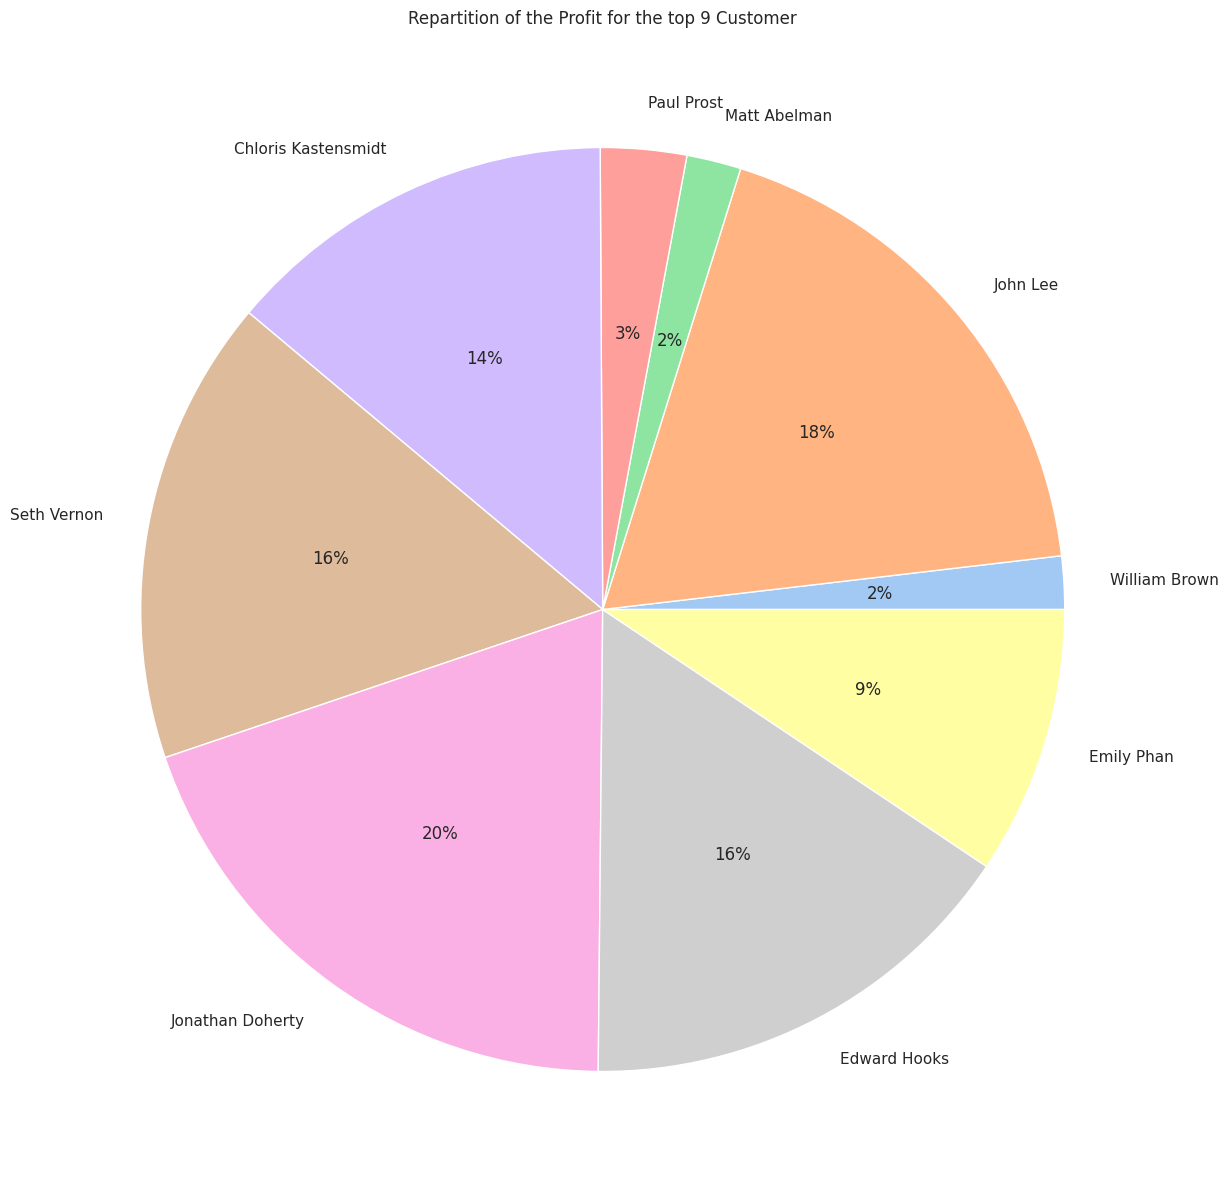

In [112]:
plt.figure(figsize=(15,15))
values = A.groupby('Customer Name')['Profit'].sum()
plt.pie(values, labels = customers, colors = colors, autopct='%.0f%%')
plt.title("Repartition of the Profit for the top 9 Customer")
plt.show()

What are the Highest selling and Lowest Selling Category?

In [113]:
data_category=df['Category'].value_counts()
data_category

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

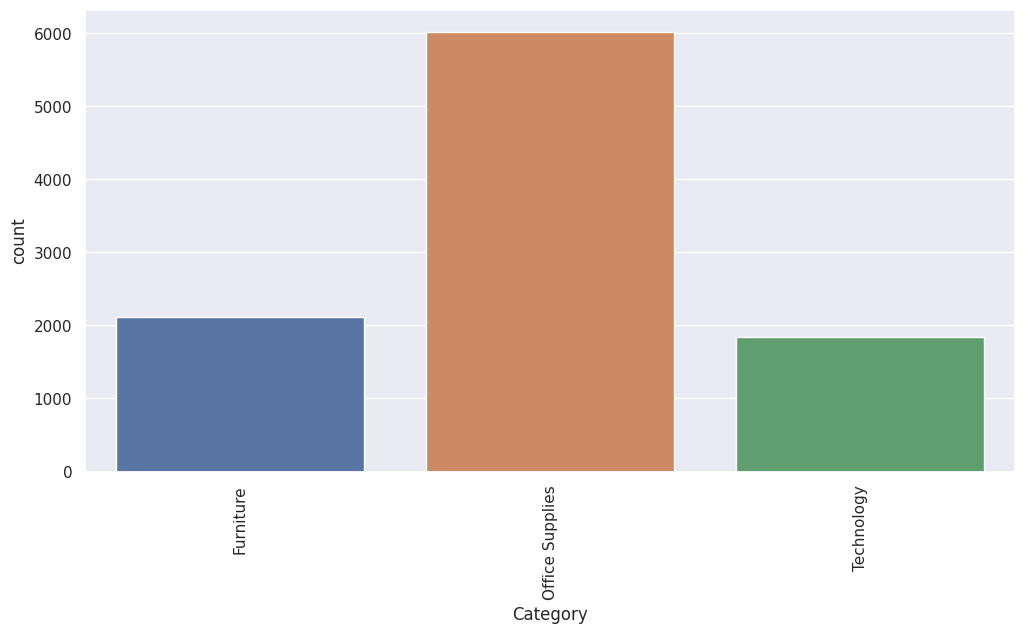

In [114]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Category'])
plt.xticks(rotation=90)
plt.show()

How much each Category is contributing in Sales of SuperStore?

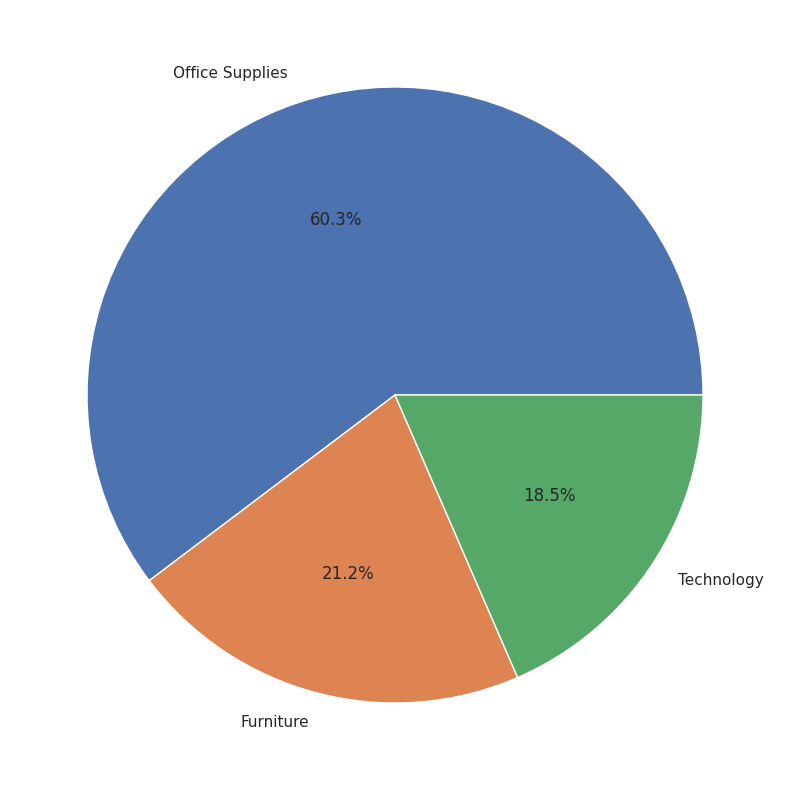

In [115]:
plt.figure(figsize=(15,10))
plt.pie(df['Category'].value_counts(),labels=df["Category"].value_counts().keys(),autopct="%0.1f%%")
plt.show()

Group Category by profit and sale


In [116]:
df.groupby('Category')['Profit'].sum()

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

In [117]:
df.groupby('Category')['Sales'].sum()

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

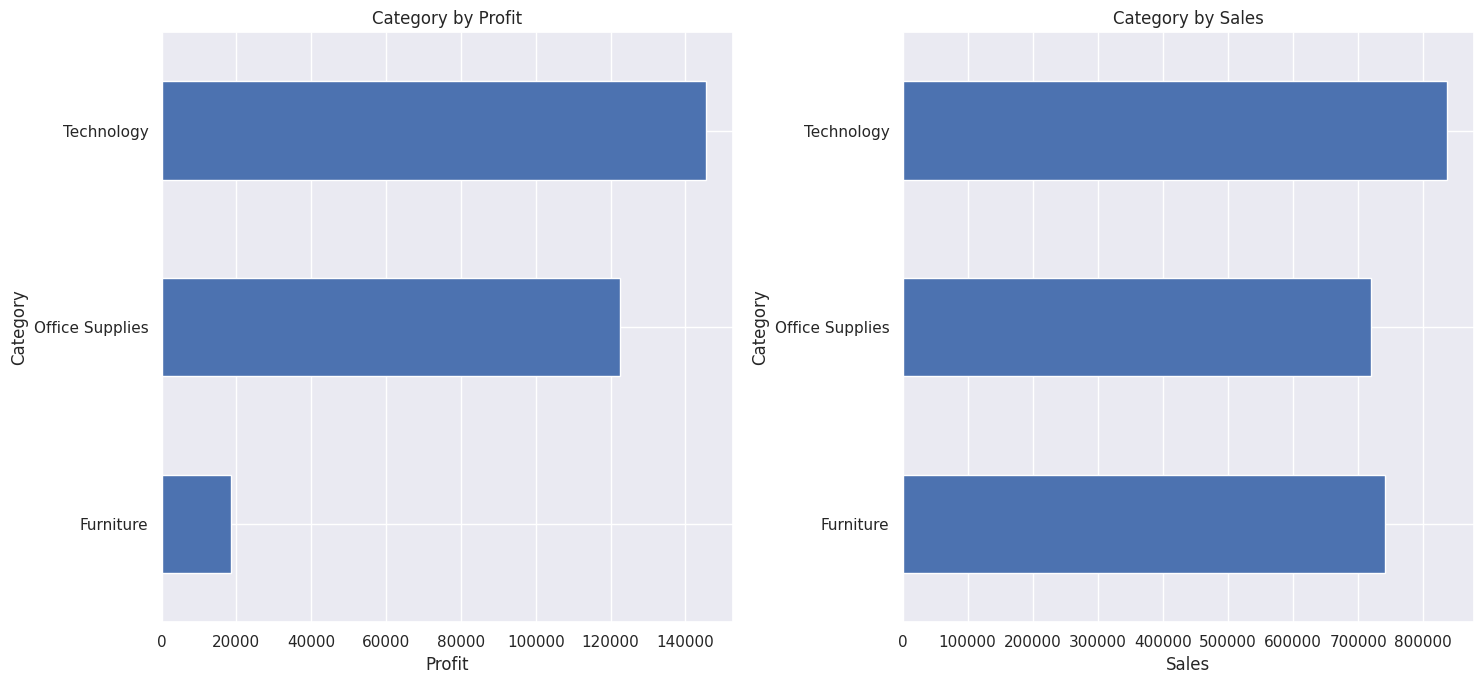

In [118]:
category_profit = df.groupby('Category')['Profit'].sum()
category_sales = df.groupby('Category')['Sales'].sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

category_profit.plot(kind='barh', ax=ax1)
ax1.set_title('Category by Profit')
ax1.set_xlabel('Profit')


category_sales.plot(kind='barh', ax=ax2)
ax2.set_title('Category by Sales')
ax2.set_xlabel('Sales')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Quantity'}, ylabel='Category'>

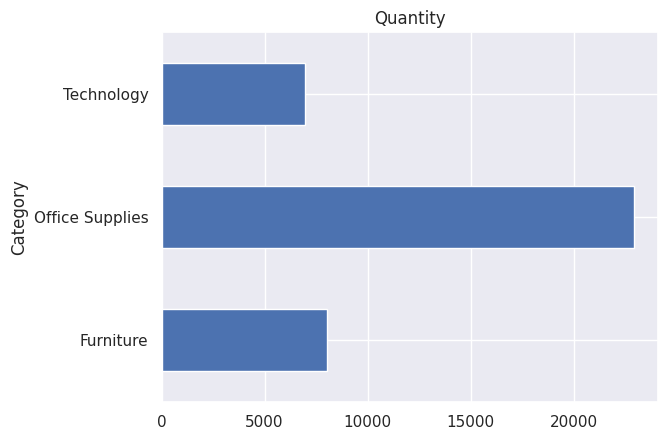

In [119]:
df.groupby('Category')['Quantity'].sum().plot(kind='barh',title='Quantity')

Group by Region and Category

<Axes: title={'center': 'Quantity that has been sold'}, ylabel='Region,Category'>

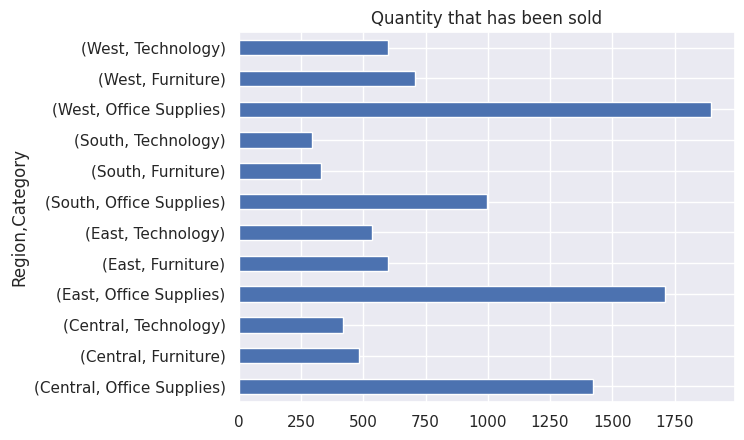

In [120]:
df.groupby('Region')['Category'].value_counts().plot(kind='barh',title='Quantity that has been sold')

Sate Grouping by sales and profit

In [121]:
data_state = df.groupby(['State'])[['Sales','Profit']].mean()
data_state

,Sales,Profit
State,,
Alabama,319.846557,94.865989
Arizona,157.508933,-15.303235
Arkansas,194.635500,66.811452
California,228.729451,38.171608
Colorado,176.418231,-35.867351
Connecticut,163.223866,42.823071
Delaware,285.948635,103.930988
District of Columbia,286.502000,105.958930
Florida,233.612815,-8.875461


In [122]:
data_state1 = data_state.sort_values('Profit')
data_state

,Sales,Profit
State,,
Alabama,319.846557,94.865989
Arizona,157.508933,-15.303235
Arkansas,194.635500,66.811452
California,228.729451,38.171608
Colorado,176.418231,-35.867351
Connecticut,163.223866,42.823071
Delaware,285.948635,103.930988
District of Columbia,286.502000,105.958930
Florida,233.612815,-8.875461


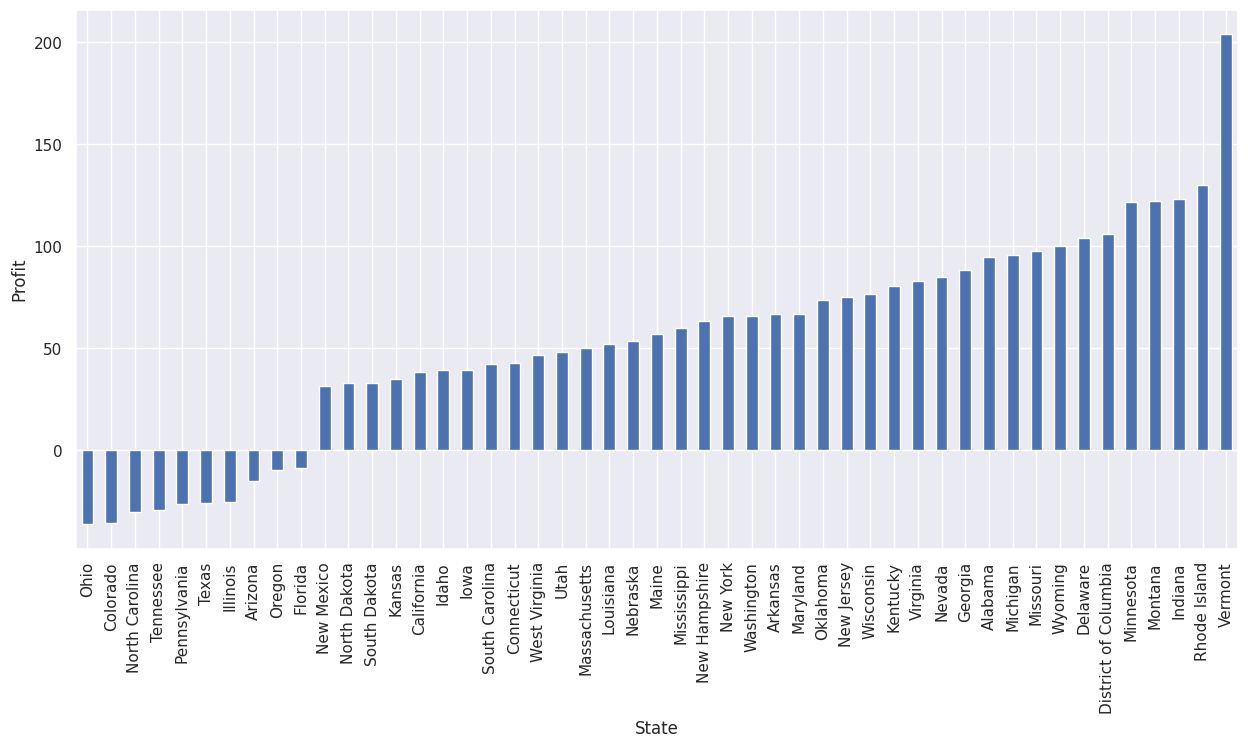

In [123]:
data_state1['Profit'].plot(kind='bar', figsize=(15, 7))
plt.ylabel("Profit")
plt.show()

In [124]:
data_state2 = data_state.sort_values('Sales')
data_state2

,Sales,Profit
State,,
South Dakota,109.630000,32.902358
Kansas,121.429583,34.851813
New Mexico,129.284378,31.273408
North Dakota,131.415714,32.878529
Oregon,140.573790,-9.600569
Iowa,152.658667,39.460397
Arizona,157.508933,-15.303235
Maine,158.816250,56.810775
Illinois,162.939230,-25.625787


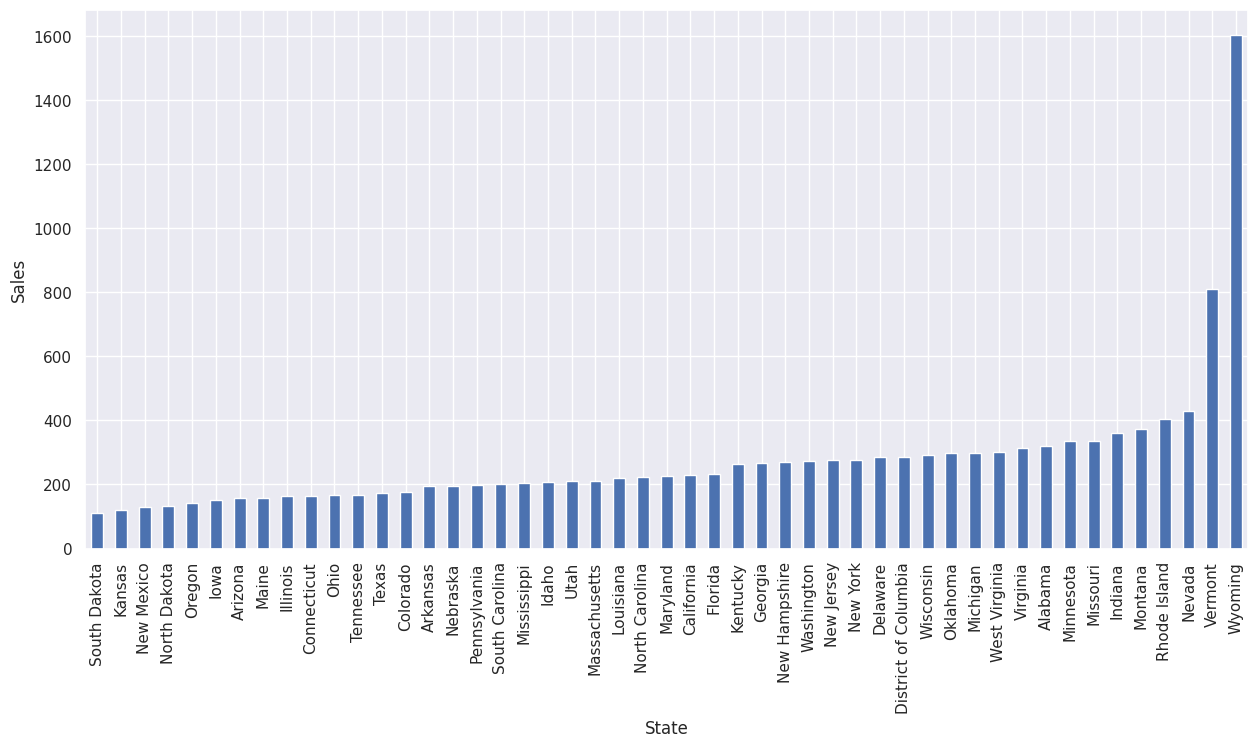

In [125]:
data_state2['Sales'].plot(kind='bar', figsize=(15,7))
plt.ylabel("Sales")
plt.show()

Shorted values by Profit

<Axes: xlabel='State'>

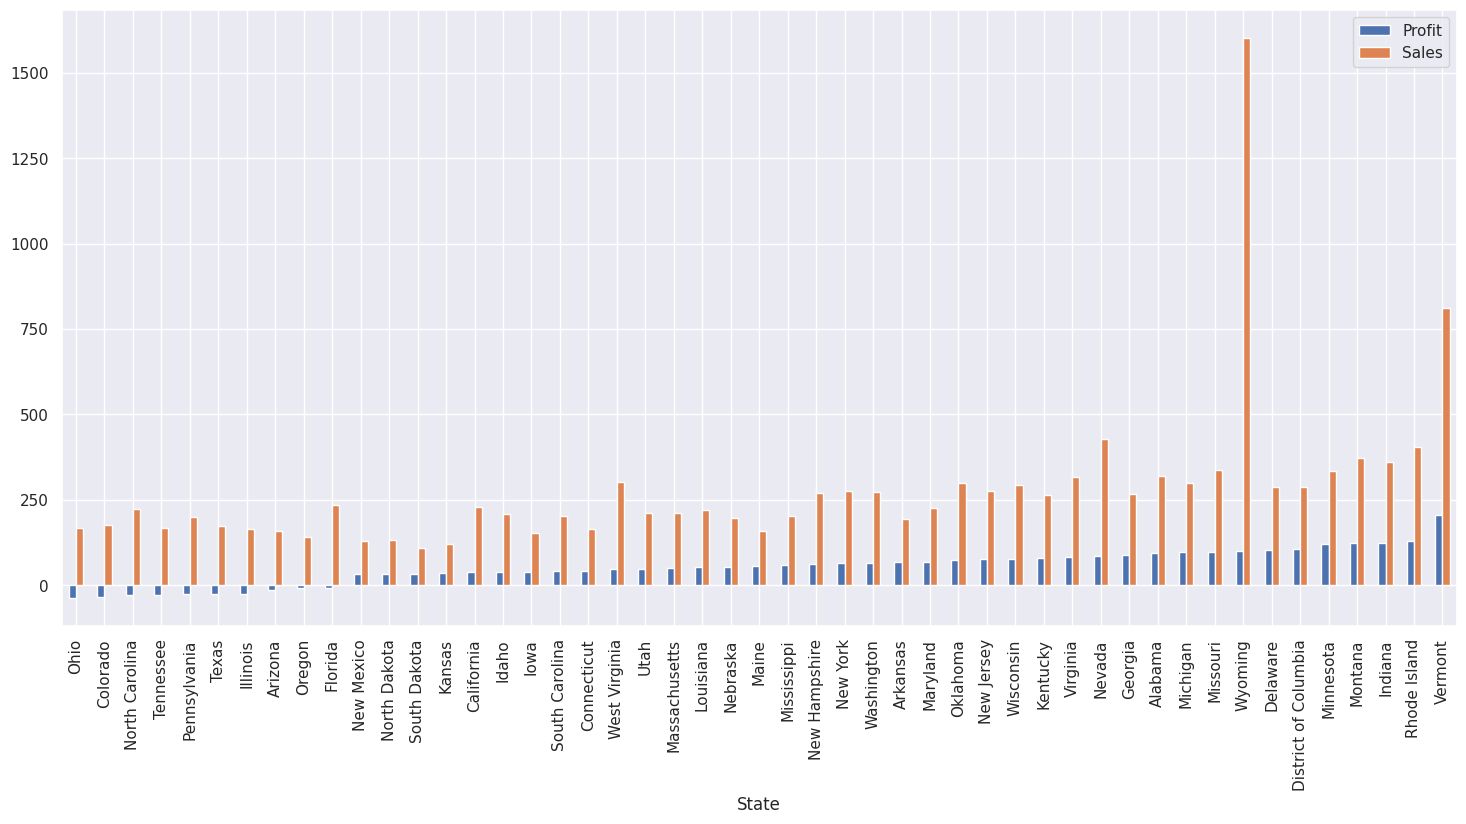

In [126]:
data_state.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(18,8))

Shorted Vlues by Sales

<Axes: xlabel='State'>

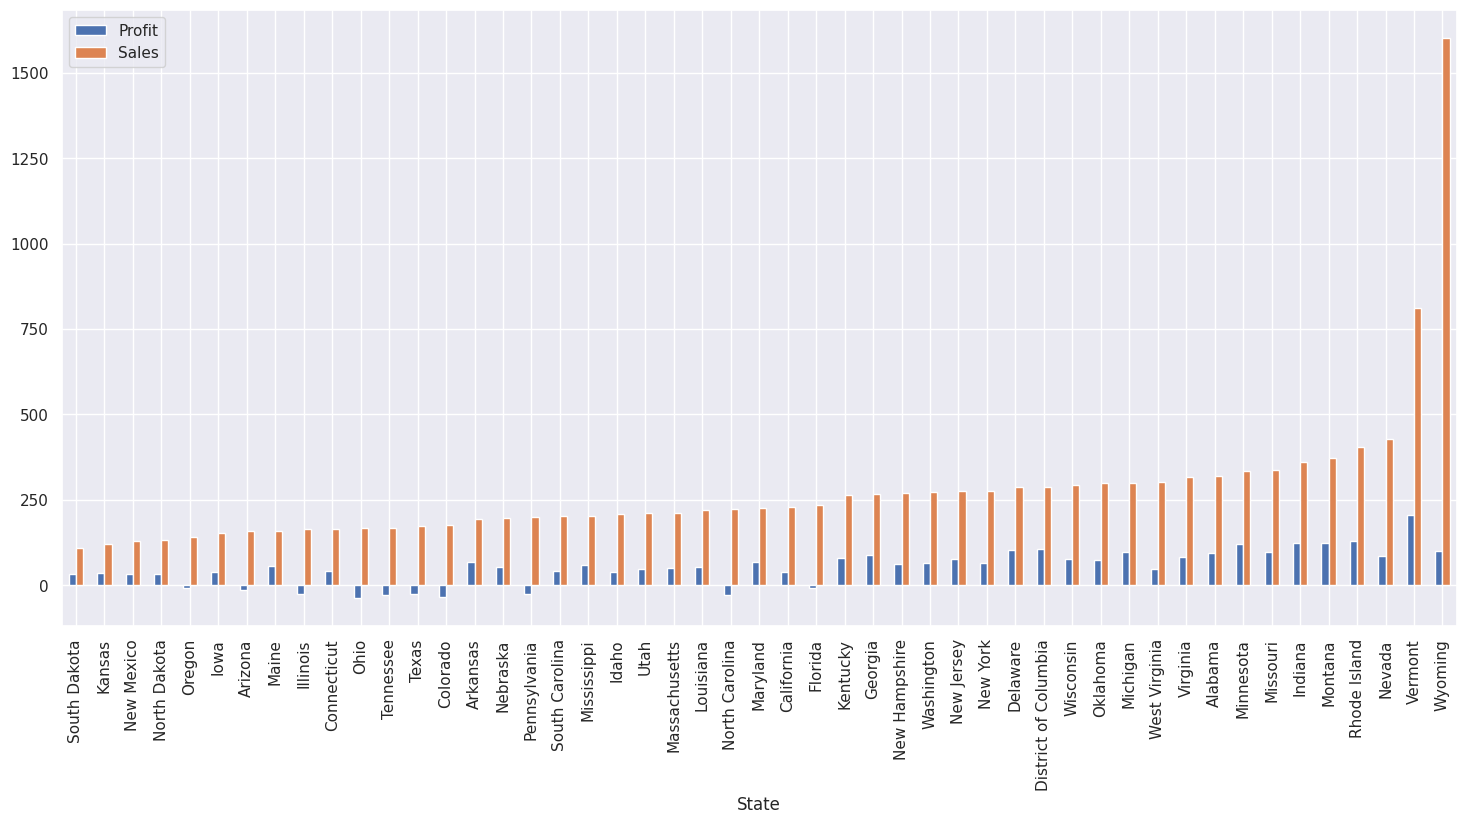

In [127]:
data_state.sort_values('Sales')[['Profit','Sales']].plot(kind='bar', figsize=(18,8))

Sub_Category Grouping by sales and profit

In [128]:
data_subcat = df.groupby(['Sub-Category'])[['Sales','Profit']].mean()
data_subcat

,Sales,Profit
Sub-Category,,
Accessories,215.974604,54.111788
Appliances,230.755710,38.922758
Art,34.068834,8.200737
Binders,133.560560,19.843574
Bookcases,503.859633,-15.230509
Chairs,532.332420,43.095894
Copiers,2198.941618,817.909190
Envelopes,64.867724,27.418019
Fasteners,13.936774,4.375660


Short by Sales

<Axes: xlabel='Sub-Category'>

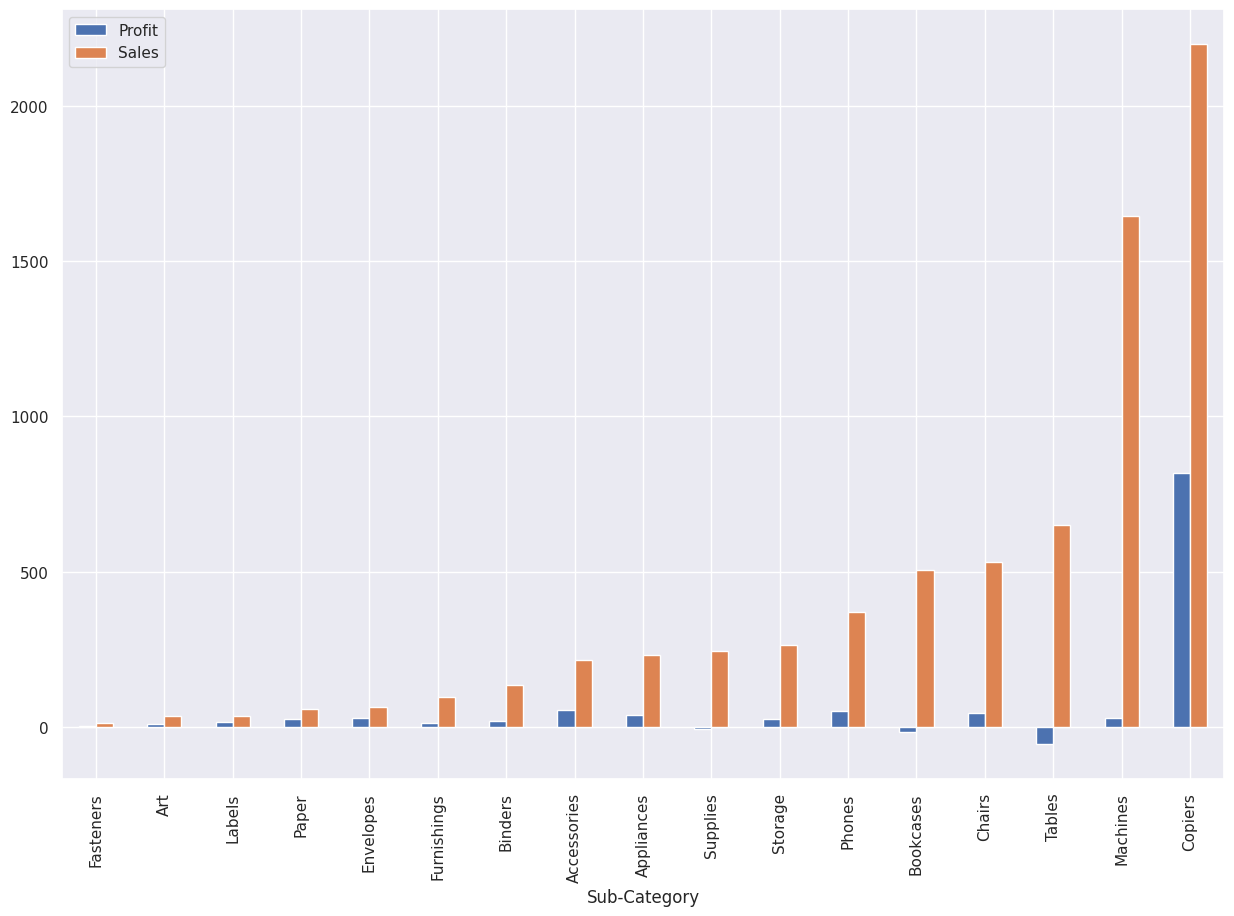

In [129]:
data_subcat.sort_values('Sales')[['Profit','Sales']].plot(kind='bar', figsize=(15,10))

Short by Profit

<Axes: xlabel='Sub-Category'>

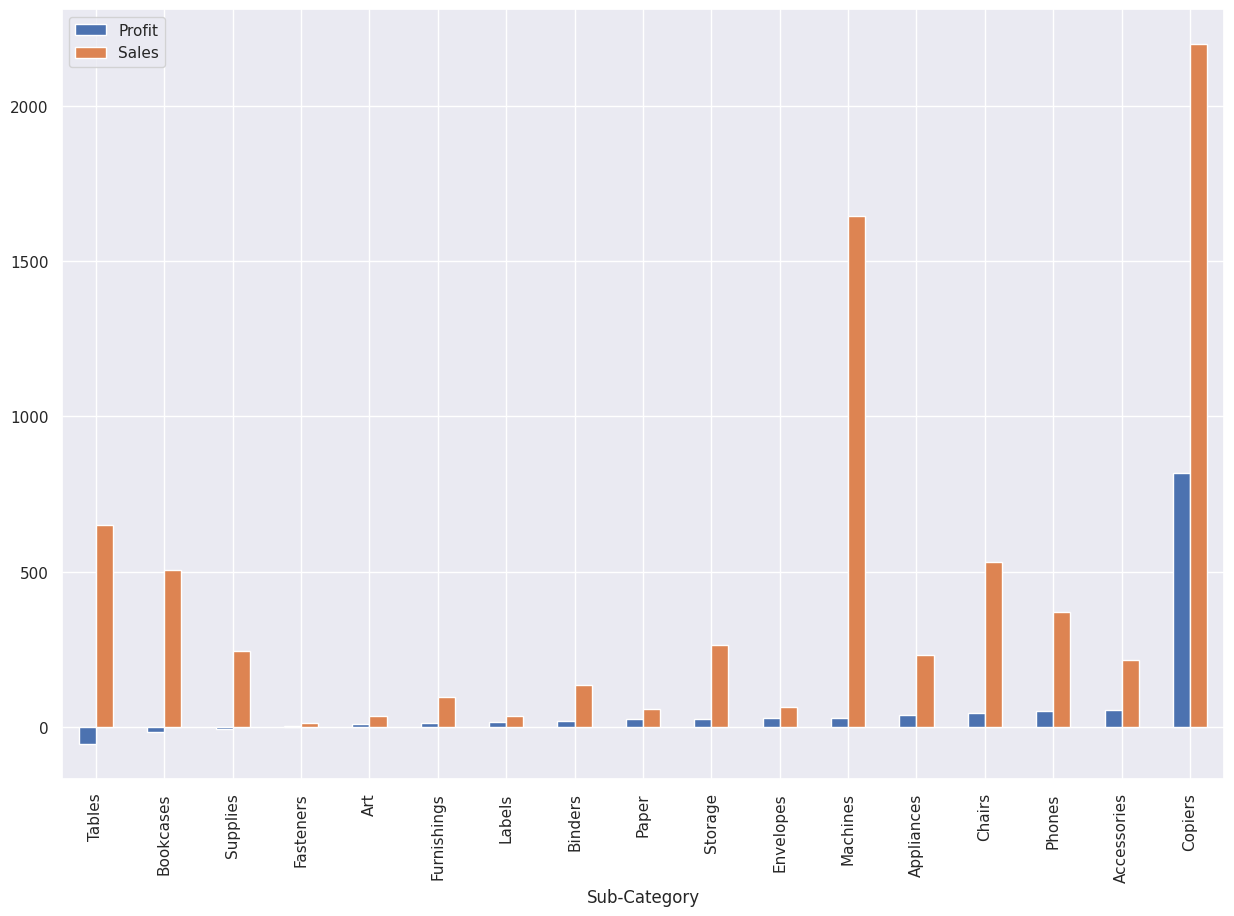

In [130]:
data_subcat.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(15,10))

In [131]:
data_subcat = df.groupby(['Sub-Category'])[['Sales','Discount','Quantity']].mean()
data_subcat

,Sales,Discount,Quantity
Sub-Category,,,
Accessories,215.974604,0.078452,3.840000
Appliances,230.755710,0.166524,3.710300
Art,34.068834,0.074874,3.768844
Binders,133.560560,0.372292,3.922521
Bookcases,503.859633,0.211140,3.807018
Chairs,532.332420,0.170178,3.818476
Copiers,2198.941618,0.161765,3.441176
Envelopes,64.867724,0.080315,3.566929
Fasteners,13.936774,0.082028,4.211982


<Axes: xlabel='Sub-Category'>

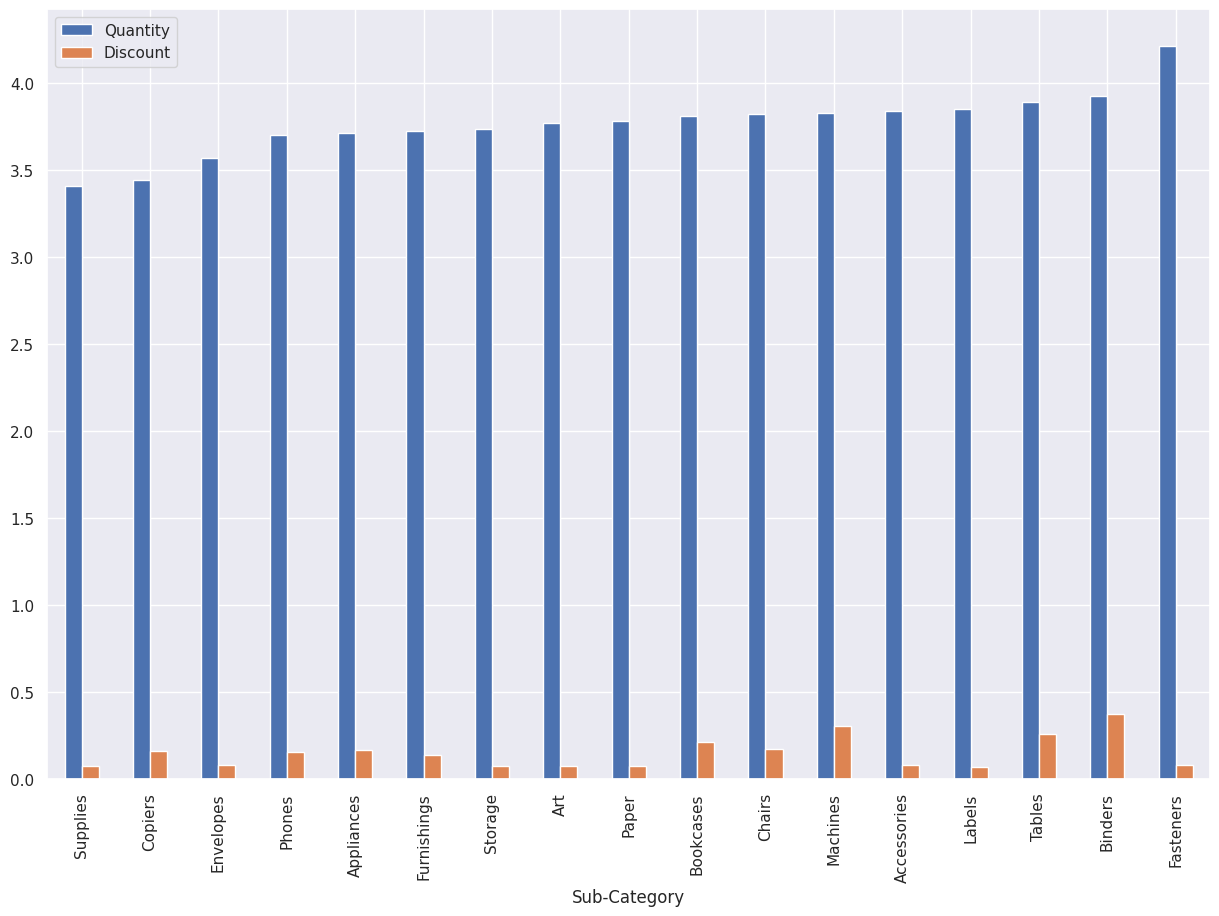

In [132]:
data_subcat.sort_values('Quantity')[['Quantity','Discount']].plot(kind='bar', figsize=(15,10))

Which City has the highest order and In which do we need to grow our Business?
531 City there are too many city so the information may not be too interesting to deal with we can see which city order the most technology product or others categories

In [133]:
df["City"].value_counts().head(10)

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: City, dtype: int64

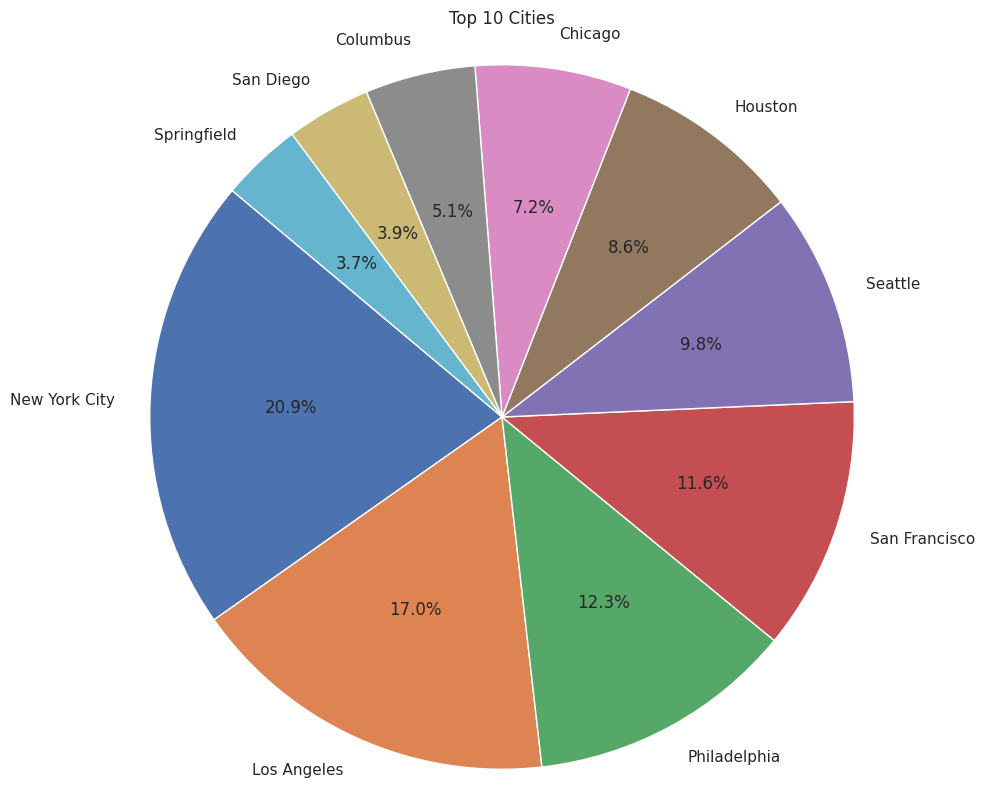

In [134]:
top_10_cities = df["City"].value_counts().head(10)
plt.figure(figsize=(10, 10))
plt.pie(top_10_cities, labels=top_10_cities.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Top 10 Cities")
plt.show()

Top 10 Cities by profit and sales

In [135]:
top_cities_by_profit = df.nlargest(10, 'Profit')
print("Top 10 cities by Profit:")
print(top_cities_by_profit[['City', 'Profit']])

top_cities_by_sales = df.nlargest(10, 'Sales')
print("\nTop 10 cities by Sales:")
print(top_cities_by_sales[['City', 'Sales']])

Top 10 cities by Profit:
               City     Profit
6826      Lafayette  8399.9760
8153        Seattle  6719.9808
4190         Newark  5039.9856
9039        Detroit  4946.3700
4098    Minneapolis  4630.4755
2623  New York City  3919.9888
509         Atlanta  3177.4750
8488      Arlington  2799.9840
7666     Providence  2591.9568
6520        Jackson  2504.2216

Top 10 cities by Sales:
               City      Sales
2697   Jacksonville  22638.480
6826      Lafayette  17499.950
8153        Seattle  13999.960
2623  New York City  11199.968
4190         Newark  10499.970
9039        Detroit   9892.740
4098    Minneapolis   9449.950
4277       Lakewood   9099.930
8488      Arlington   8749.950
6425   Philadelphia   8399.976


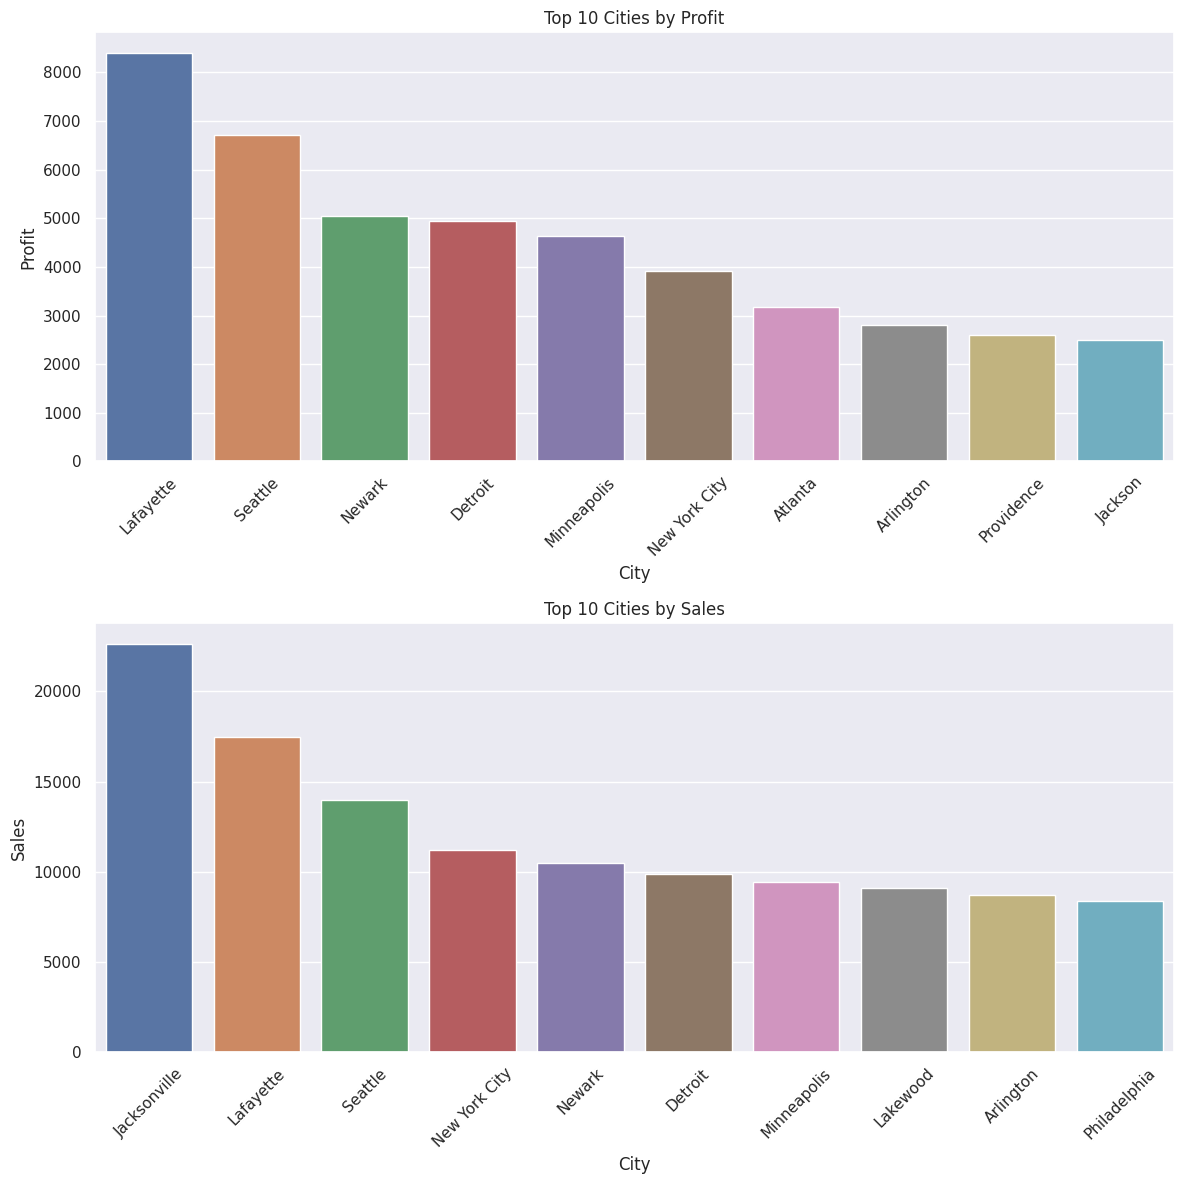

In [136]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Plot top 10 cities by profit (Vertical)
sns.barplot(x='City', y='Profit', data=top_cities_by_profit, ax=axes[0])
axes[0].set_title("Top 10 Cities by Profit")
axes[0].set_xlabel("City")
axes[0].set_ylabel("Profit")
axes[0].tick_params(axis='x', rotation=45)

# Plot top 10 cities by sales (Vertical)
sns.barplot(x='City', y='Sales', data=top_cities_by_sales, ax=axes[1])
axes[1].set_title("Top 10 Cities by Sales")
axes[1].set_xlabel("City")
axes[1].set_ylabel("Sales")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Visualize Discount With Profit

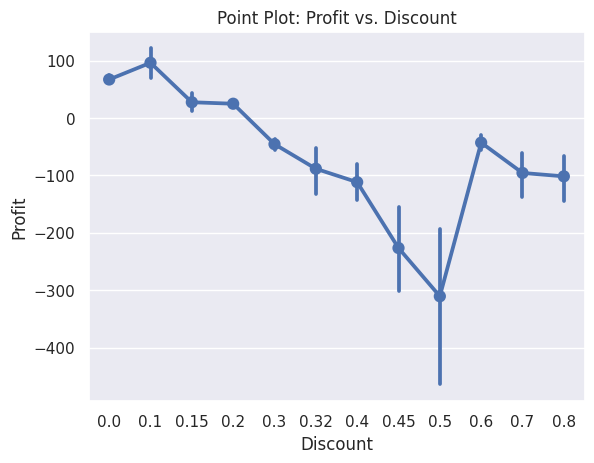

In [137]:
sns.pointplot(x='Discount', y='Profit', data=df)

# Set plot title and labels
plt.title('Point Plot: Profit vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')

# Show the plot
plt.show()

Here we can't remove all out liers.If we do it then in our data have too much data

In [139]:
# Drop the specified columns
columns_to_drop = ['Row ID', 'Order ID', 'Order Date','Country','Customer ID','Customer Name','Product ID','State','Ship Date']

df.drop(columns_to_drop, axis=1, inplace=True)

In [140]:
df.shape

(9994, 12)

After Dropping Remaining Column

In [141]:
column_names = df.columns.tolist()
for column in column_names:
    print(column)

Ship Mode
Segment
City
Postal Code
Region
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit


Check And Drop Duplicate Row

In [142]:
duplicate_rows = df.duplicated()
num_duplicate_rows = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicate_rows)

Number of duplicate rows: 4


In [143]:
df.drop_duplicates(inplace=True)

In [144]:
df.shape

(9990, 12)

In [145]:
num_rows = df.shape[0]
num_cols = df.shape[1]

print(f"The data sheet has {num_rows} rows and {num_cols} columns.")

The data sheet has 9990 rows and 12 columns.


Correlation among the variable

In [147]:
corr=df.corr()
corr

<ipython-input-147-7d5195e2bf4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023797,0.012779,0.058540,-0.029955
Sales,-0.023797,1.000000,0.200799,-0.028105,0.479066
Quantity,0.012779,0.200799,1.000000,0.008741,0.066235
Discount,0.058540,-0.028105,0.008741,1.000000,-0.219559
Profit,-0.029955,0.479066,0.066235,-0.219559,1.000000


<ipython-input-148-739249dc621d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)


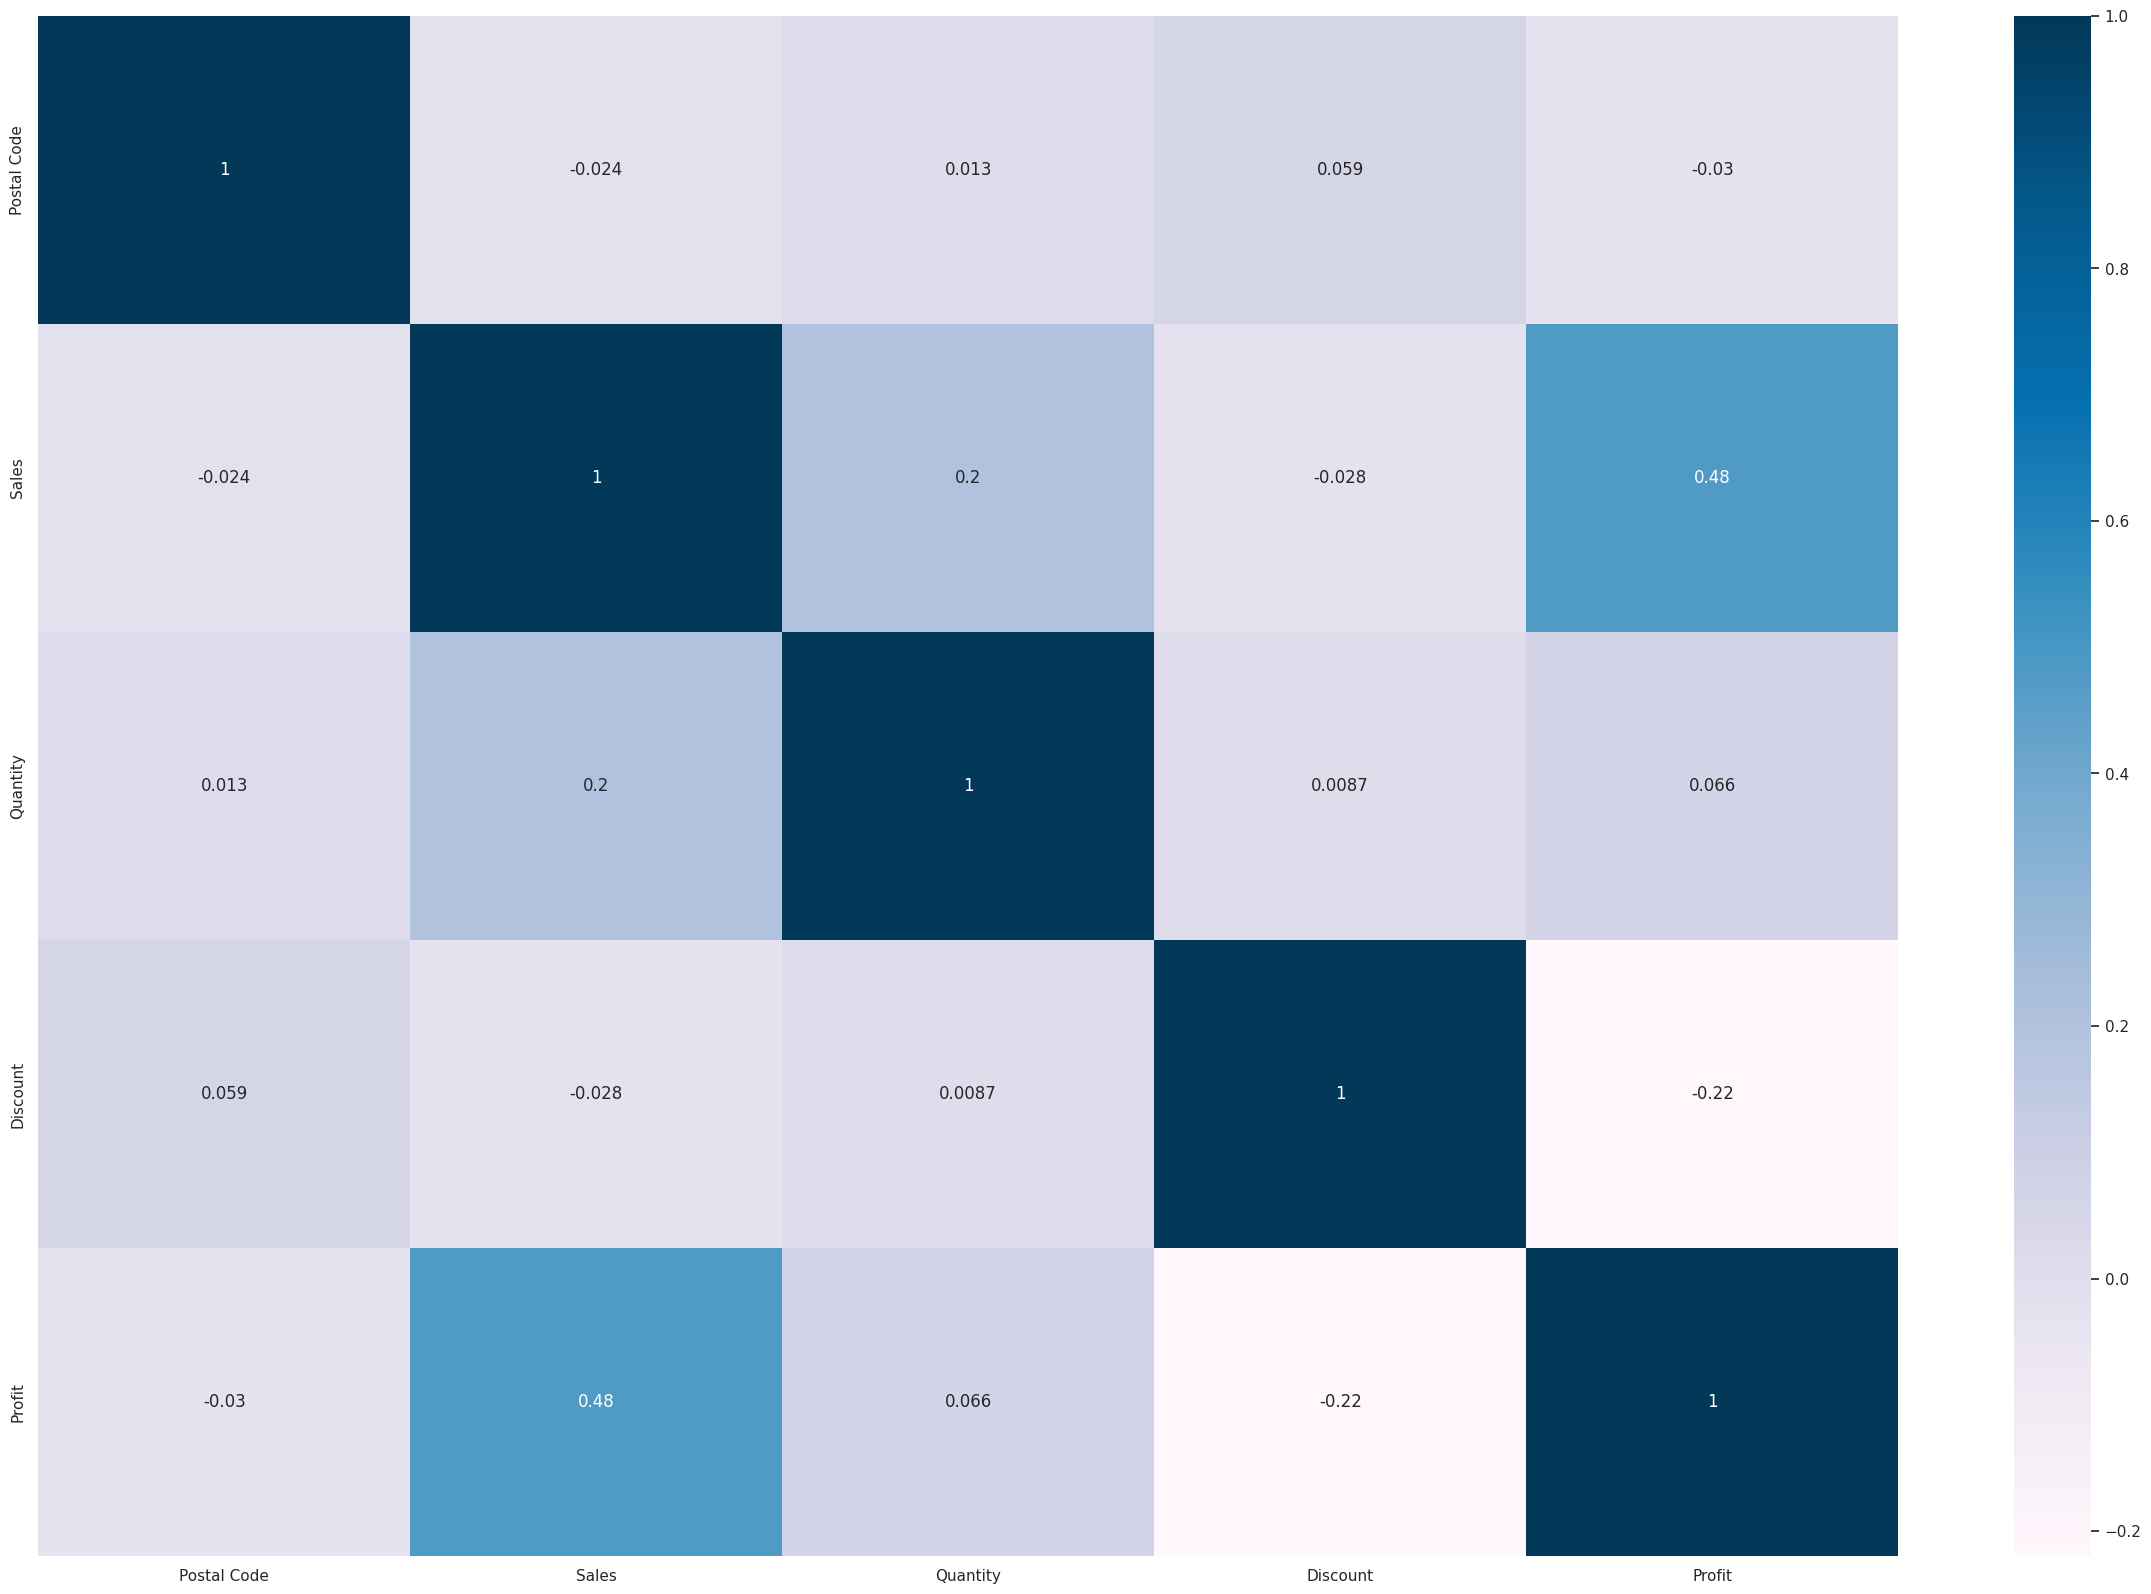

In [148]:
print('\n')
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()
print('\n')

Detect Outlier

In [150]:
def detect_outliers(df):
    outliers = {}
    for column in df.columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
        num_outliers = len(outlier_indices)
        if num_outliers > 0:
            outliers[column] = num_outliers
    return outliers

outliers = detect_outliers(df[['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']])

if outliers:
    print("Columns with outliers:")
    for column, count in outliers.items():
        print(f"{column}: {count} outliers")
else:
    print("No outliers found.")

Columns with outliers:
Sales: 1167 outliers
Quantity: 170 outliers
Discount: 855 outliers
Profit: 1881 outliers


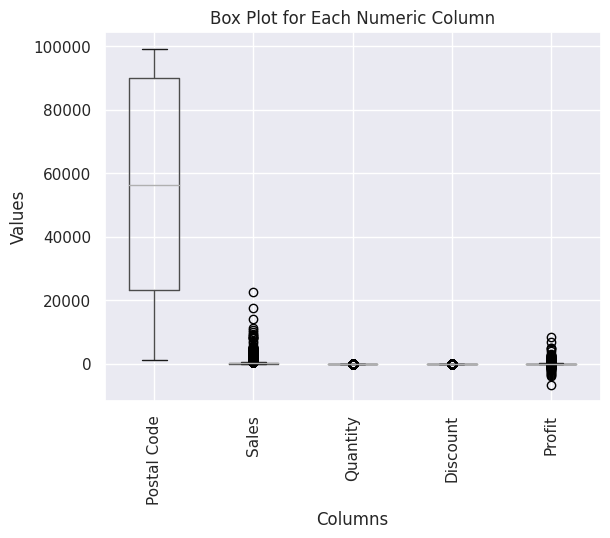

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame 'df'

# Filter out non-numeric columns
numeric_df = df.select_dtypes(include=['int', 'float'])

# Check if there are any numeric columns
if not numeric_df.empty:
    fig, ax = plt.subplots()
    numeric_df.boxplot(ax=ax)
    ax.set_xlabel('Columns')
    ax.set_ylabel('Values')
    ax.set_title('Box Plot for Each Numeric Column')
    plt.xticks(rotation='vertical')
    plt.show()
else:
    print("No numeric columns found to create box plots.")

Remove Outlier

In [152]:
column_names = ['Sales', 'Quantity', 'Discount', 'Profit']

def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df= df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df

for column_name in column_names:
    df = remove_outliers(df, column_name)

In [153]:
def detect_outliers(df):
    outliers = {}
    for column in df.columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
        num_outliers = len(outlier_indices)
        if num_outliers > 0:
            outliers[column] = num_outliers
    return outliers

outliers = detect_outliers(df[['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']])

if outliers:
    print("Columns with outliers:")
    for column, count in outliers.items():
        print(f"{column}: {count} outliers")
else:
    print("No outliers found.")

Columns with outliers:
Sales: 618 outliers
Quantity: 245 outliers
Profit: 454 outliers


Training and Testing Data sheet. LogisticRegression

In [156]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [157]:
# Define the threshold for binary classification (you can adjust this as needed)
profit_threshold = 0

# Convert 'Profit' to binary format (1 if 'Profit' > profit_threshold, 0 otherwise)
df['Profit_Class'] = df['Profit'].apply(lambda x: 1 if x > profit_threshold else 0)

In [160]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Ship Mode', 'City', 'Region', 'Category', 'Sub-Category'])

# Define the feature columns for prediction (excluding 'Profit' and 'Profit_Class')
feature_columns = ['Sales', 'Quantity', 'Discount'] + list(df_encoded.columns[df_encoded.columns.str.startswith('Ship Mode_')])

In [161]:
# Split the data into features (X) and target (y)
X = df_encoded[feature_columns]
y = df_encoded['Profit_Class']

In [162]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [163]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [164]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the prediction accuracy
accuracy = accuracy_score(y_test, y_pred)

In [165]:
print("Confusion Matrix:")
print(conf_matrix)
print("Prediction Accuracy:", accuracy)

Confusion Matrix:
[[   9   91]
 [   5 1248]]
Prediction Accuracy: 0.9290465631929047


Training and Testing Data sheet. LearRegression

In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [167]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Ship Mode', 'City', 'Region', 'Category', 'Sub-Category'])

# Define the feature columns for prediction (excluding 'Profit')
feature_columns = ['Sales', 'Quantity', 'Discount'] + list(df_encoded.columns[df_encoded.columns.str.startswith('Ship Mode_')])

In [168]:
# Split the data into features (X) and target (y)
X = df_encoded[feature_columns]
y = df_encoded['Profit']

In [169]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [170]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [171]:

# Calculate Mean Squared Error (MSE) and R-squared (R2) as evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) for Linear:", mse)
print("R-squared (R2) for Linear:", r2)

Mean Squared Error (MSE) for Linear: 125.96858711172136
R-squared (R2) for Linear: 0.27780380818229433


RandomForestRegression

In [172]:
# Create a Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

In [173]:
# Train the Random Forest model using the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [174]:
# Make predictions on the test set using Random Forest
y_pred_rf = rf_model.predict(X_test)

In [175]:
# Calculate Mean Squared Error (MSE) and R-squared (R2) for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression:")
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R2):", r2_rf)

Random Forest Regression:
Mean Squared Error (MSE): 91.13846507535527
R-squared (R2): 0.47748995273593886


DecosionTree

In [176]:
from sklearn.tree import DecisionTreeRegressor
# Create a Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)

In [177]:
# Train the Decision Tree model using the training data
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [178]:
# Make predictions on the test set using Decision Tree
y_pred_dt = dt_model.predict(X_test)

In [179]:
# Calculate Mean Squared Error (MSE) and R-squared (R2) for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [180]:
print("Decision Tree Regression:")
print("Mean Squared Error (MSE):", mse_dt)
print("R-squared (R2):", r2_dt)

Decision Tree Regression:
Mean Squared Error (MSE): 143.97171729526488
R-squared (R2): 0.17458925003358494


For profit prediction, I generally want a model that can accurately capture the underlying patterns and relationships in my data to make reliable profit predictions. In my provided metrics, it seems that the Random Forest Regression model has the lowest Mean Squared Error (MSE) and the highest R-squared (R2) value compared to the other regression models.

Since profit prediction is a regression task, and considering the lower MSE and higher R2 of the Random Forest Regression, it suggests that the Random Forest model might be the most suitable choice among the options my provided for accurately predicting profit.